In [56]:
from qiskit import QuantumRegister, ClassicalRegister, Aer, QuantumCircuit, transpile
from qiskit.quantum_info import Statevector
import numpy as np
from qiskit.visualization import plot_histogram

In [2]:
alice = QuantumRegister(1, name="alice")
bob = QuantumRegister(1, name="bob")

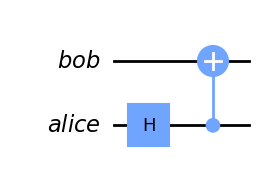

In [81]:
entangled_state = QuantumCircuit(bob, alice)

entangled_state.h(alice)
entangled_state.cx(alice, bob)

entangled_state.draw("mpl")

In [20]:
black_box_state = entangled_state.to_gate(label="entangled_state")

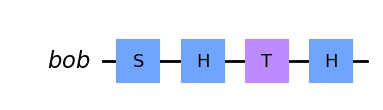

In [41]:
bob_measurement_circuit1 = QuantumCircuit(bob)
bob_measurement_circuit1.s(bob)
bob_measurement_circuit1.h(bob)
bob_measurement_circuit1.t(bob)
bob_measurement_circuit1.h(bob)
bob_measurement_circuit1.draw("mpl")

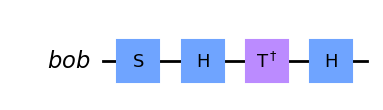

In [42]:
bob_measurement_circuit2 = QuantumCircuit(bob)
bob_measurement_circuit2.s(bob)
bob_measurement_circuit2.h(bob)
bob_measurement_circuit2.tdg(bob)
bob_measurement_circuit2.h(bob)
bob_measurement_circuit2.draw("mpl")

In [46]:
B  = bob_measurement_circuit1.to_gate(label="B")
B_ = bob_measurement_circuit2.to_gate(label="B'")

In [53]:
out = ClassicalRegister(2, name="out")

In [55]:
sim = Aer.get_backend("aer_simulator")

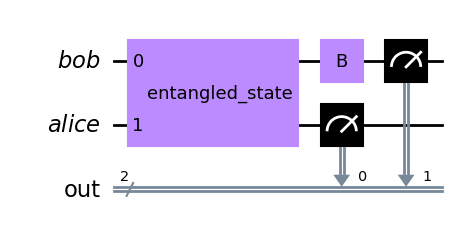

In [100]:
qc1 = QuantumCircuit(bob, alice, out)

qc1.append(black_box_state, [bob, alice])
qc1.append(B, bob)
qc1.measure(alice, out[0])
qc1.measure(bob, out[1])
    
qc1.draw("mpl")

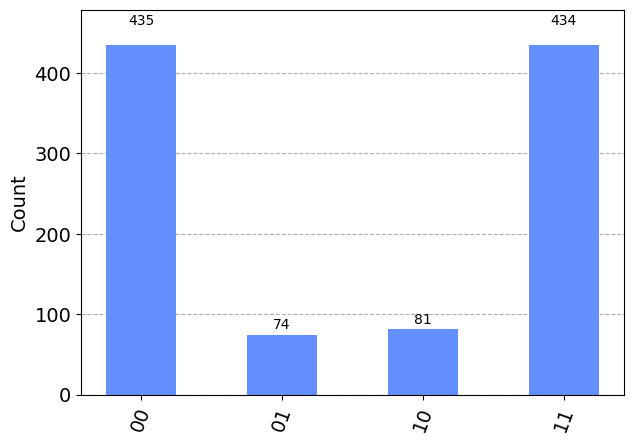

In [101]:
qc1_result = sim.run(transpile(qc1, sim)).result().get_counts()
plot_histogram(qc1_result)

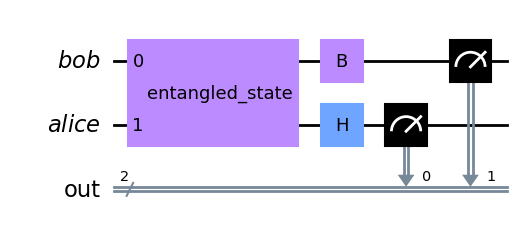

In [87]:
qc2 = QuantumCircuit(bob, alice, out)

qc2.append(black_box_state, [bob, alice])
qc2.append(B, bob)

qc2.h(alice)
qc2.measure(alice, out[0])
qc2.measure(bob, out[1])

qc2.draw("mpl")

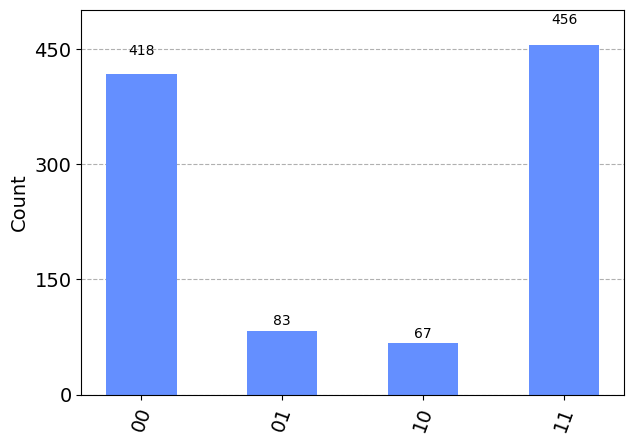

In [88]:
qc2_result = sim.run(transpile(qc2, sim)).result().get_counts()
plot_histogram(qc2_result)

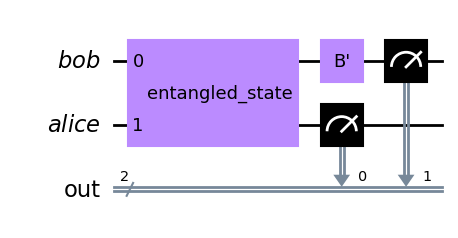

In [89]:
qc3 = QuantumCircuit(bob, alice, out)

qc3.append(black_box_state, [bob, alice])
qc3.append(B_, bob)

qc3.measure(alice, out[0])
qc3.measure(bob, out[1])

qc3.draw("mpl")

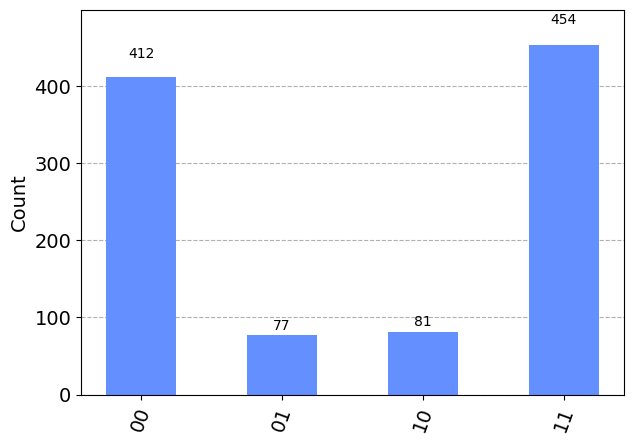

In [90]:
qc3_result = sim.run(transpile(qc3, sim)).result().get_counts()
plot_histogram(qc3_result)

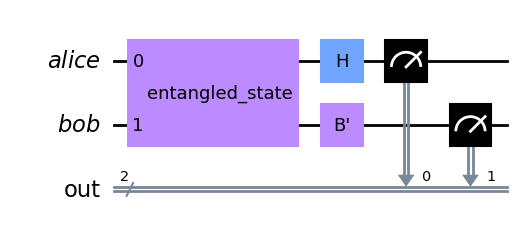

In [98]:
qc4 = QuantumCircuit(alice, bob, out)

qc4.append(black_box_state, [alice, bob])
qc4.append(B_, bob)


qc4.h(alice)
qc4.measure(alice, out[0])
qc4.measure(bob, out[1])

qc4.draw("mpl")

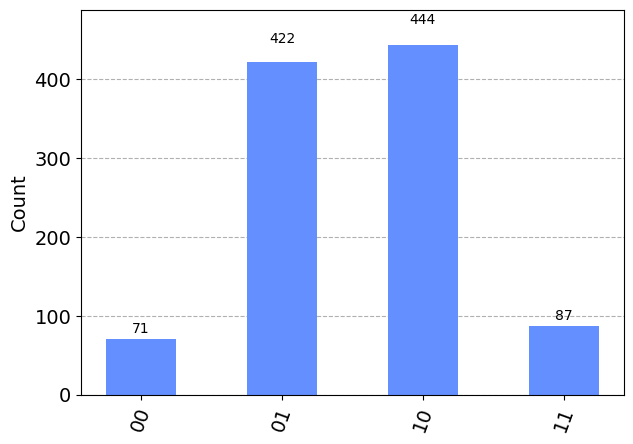

In [92]:
qc4_result = sim.run(transpile(qc4, sim)).result().get_counts()
plot_histogram(qc4_result)

In [103]:
distribution = {
    "AB":[], 
    "A'B":[],
    "AB'":[],
    "A'B'":[]
}

shots = 1024

def encode_key(index):
    return list(distribution.keys())[index]

for index, results in enumerate([qc1_result, qc2_result, qc3_result, qc4_result]):
    distribution[encode_key(index)] = [ 
        results['00']/1024,
        results['01']/1024,
        results['10']/1024,
        results['11']/1024
    ]

distribution

{'AB': [0.4248046875, 0.072265625, 0.0791015625, 0.423828125],
 "A'B": [0.408203125, 0.0810546875, 0.0654296875, 0.4453125],
 "AB'": [0.40234375, 0.0751953125, 0.0791015625, 0.443359375],
 "A'B'": [0.0693359375, 0.412109375, 0.43359375, 0.0849609375]}

In [106]:
def E(probabilities):
    return probabilities[0] - probabilities[1] - probabilities[2] + probabilities[3]

In [107]:
AB = E(distribution['AB'])
A_B = E(distribution["A'B"])
AB_ = E(distribution["AB'"])
A_B_ = E(distribution["A'B'"])

AB + A_B + AB_ - A_B_

2.787109375